In [604]:
import numpy as np
import time
np.random.seed(0)
kNumFeatures = 20
kMapSize = 25
obstacles = np.random.rand(2,kNumFeatures)*kMapSize
kInfluenceRadius = 3
xStart = np.array([0,0])
xGoal = np.array([kMapSize,kMapSize]).reshape(2,-1)
# xRobot = kStart
xRobot = np.array([30, 35]).reshape(2,-1)
print(xRobot.shape)
kGoal = 1
kObjects = 1
GoalError =  xGoal - xRobot;

tmp = np.tile(xRobot,(1,kNumFeatures))
print(tmp)
print(tmp.shape)

(2, 1)
[[30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30]
 [35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35]]
(2, 20)


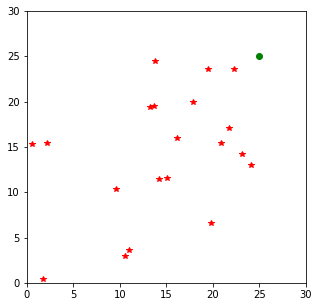

In [605]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.ylim(0, kMapSize+5)
plt.xlim(0, kMapSize+5)
plt.plot(obstacles[0,:],obstacles[1,:],'r*');
plt.plot(xRobot[0],xRobot[1],'b^')
plt.plot(xGoal[0],xGoal[1],'go')

In [606]:
relative_positions = obstacles - np.tile(xRobot,(1,kNumFeatures))
print(relative_positions)
print(relative_positions.shape)

[[-16.2796624  -12.12026584 -14.9309156  -16.37792043 -19.40863002
  -13.85264717 -19.06031972  -7.70567498  -5.90843099 -20.41396203
  -10.20687405 -16.77762701 -15.79888597  -6.86008404 -28.22409855
  -27.82176751 -29.49454006  -9.18450386 -10.54608123  -8.24969629]
 [-10.53454144 -15.02103589 -23.46301594 -15.48677059 -32.04313935
  -19.00197447 -31.41616781 -11.38327707 -21.95379196 -24.6334515
  -28.3861097  -15.64415776 -23.59624169 -20.78915128 -34.53025499
  -19.55911257 -19.69760693 -19.57665008 -11.40629804 -17.95449252]]
(2, 20)


In [607]:
distances = np.sqrt(np.sum(np.square(relative_positions),axis=0))
print(distances)

[19.39082183 19.30109747 27.8108856  22.54054881 37.46275082 23.5153326
 36.74603908 13.74614214 22.7349629  31.99276135 30.16540239 22.93966957
 28.39696146 21.89176932 44.59751393 34.00896399 35.46721884 21.62406852
 15.53458928 19.75908122]


In [608]:
idx_proximal = distances < kInfluenceRadius

In [609]:
print(obstacles)
print(obstacles.shape)
proximal = obstacles[:,idx_proximal]
print(proximal)

[[13.7203376  17.87973416 15.0690844  13.62207957 10.59136998 16.14735283
  10.93968028 22.29432502 24.09156901  9.58603797 19.79312595 13.22237299
  14.20111403 23.13991596  1.77590145  2.17823249  0.50545994 20.81549614
  19.45391877 21.75030371]
 [24.46545856 19.97896411 11.53698406 19.51322941  2.95686065 15.99802553
   3.58383219 23.61672293 13.04620804 10.3665485   6.6138903  19.35584224
  11.40375831 14.21084872  0.46974501 15.44088743 15.30239307 15.42334992
  23.59370196 17.04550748]]
(2, 20)
[]


In [610]:
rho = np.tile(distances[idx_proximal],(2,1))
print("rho:",rho)
V = relative_positions[:,idx_proximal]
print("V:",V)
print("V shape:",V.shape)

DrhoDx = -V/rho
print("DrhoDx:",DrhoDx)
F = (1/rho-1/kInfluenceRadius)*1/(np.square(rho))*DrhoDx
print("F:",F)
FObjects = kObjects*np.sum(F,axis=1)
print("FObjects:",FObjects)

rho: []
V: []
V shape: (2, 0)
DrhoDx: []
F: []
FObjects: [0. 0.]


k = 25


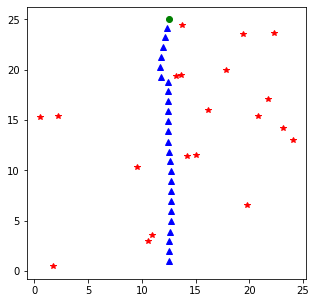

In [613]:
k = 0
kMaxSteps = 50
xRobot = np.array([kMapSize/2, 0]).reshape(2,-1)
xGoal = np.array([kMapSize/2,kMapSize]).reshape(2,-1)
GoalError =  xGoal - xRobot;

plt.figure(figsize=(5,5))
# plt.ylim(0, kMapSize+5)
# plt.xlim(0, kMapSize+5)

while (np.linalg.norm(GoalError)>1 and k < kMaxSteps):
    relative_positions = obstacles - np.tile(xRobot,(1,kNumFeatures))
    distances = np.sqrt(np.sum(np.square(relative_positions),axis=0))
    idx_proximal = distances < kInfluenceRadius
    if(any(idx_proximal)):
        rho = np.tile(distances[idx_proximal],(2,1))
        V = relative_positions[:,idx_proximal]
        DrhoDx = -V/rho
        F = (1/rho-1/kInfluenceRadius)*1/(np.square(rho))*DrhoDx
        FObjects = kObjects*np.sum(F,axis=1).reshape(-1,1)
    else:
        FObjects = np.array([0,0]).reshape(-1,1)
    FGoal = kGoal*(GoalError)/np.linalg.norm(GoalError);
    FTotal = FGoal+FObjects;
    FTotal = FTotal/np.linalg.norm(FTotal)*min(1,np.linalg.norm(FTotal))
    xRobot = xRobot+FTotal;
    plt.plot(xRobot[0],xRobot[1],'b^')
    GoalError = xGoal - xRobot
    k += 1
plt.plot(obstacles[0,:],obstacles[1,:],'r*');
plt.plot(xGoal[0],xGoal[1],'go')
print("k =",k)